# FDA Project

In [7]:
#Begin by importing pandas, regular expressions, and numpy
import pandas as pd
import re
import numpy as np
import json
import datetime
from bs4 import BeautifulSoup as bs
import requests
import re
import urllib
import time
from selenium import webdriver

#If selenium is giving issue, use pip install selenium on its own line first
#pip install webdriver-manager

DOMAIN = "https://open.fda.gov/data/downloads/"
URL = "https://open.fda.gov/data/downloads/"

In [6]:
#pip install webdriver-manager

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Open and save the JSON file. Cull metadata, only keep results.
data = json.load(open(r'C:\Users\Allen\Documents\FDA\device-event-0001-of-0001.json'))
data = data["results"]

In [ ]:
#Normalize the JSON into a dataframe

dfmain = pd.json_normalize(data,
                  record_path = "device",
                  meta = ["report_number","report_source_code","date_received","event_type","type_of_report","mdr_text"],
                  record_prefix = "_",
                  errors = "ignore")

In [ ]:
#Keep only relevant columns
dfmain = dfmain[["_device_report_product_code","_brand_name","_generic_name","_manufacturer_d_name","type_of_report","report_number","report_source_code",
                 "date_received","event_type","mdr_text"]]

#Rename columns
dfmain.columns = ["product_code","brand_name","generic_name","manufacturer_name","type_of_report","report_number",
                        "report_source_code","date_received","event_type","mdr_text"]

#Update date column to date format
dfmain["date_received"] = pd.to_datetime(dfmain["date_received"])

#Remove brackets from type of report column
dfmain['type_of_report'] = dfmain['type_of_report'].str.join(', ')

In [ ]:
#Rename columns
dfmain.columns = ["product_code","brand_name","generic_name","manufacturer_name","type_of_report","report_number",
                        "report_source_code","date_received","event_type","mdr_text"]

#Update date column to date format
dfmain["date_received"] = pd.to_datetime(dfmain["date_received"])

#Remove brackets from type of report column
dfmain['type_of_report'] = dfmain['type_of_report'].str.join(', ')

In [ ]:
Input_Start_Date = datetime.date(2020, 1, 1)
Input_End_Date = datetime.date(2020, 1, 31)

Input_Start_Date

In [ ]:
#Export to CSV
dfmain.to_csv(r'data.csv', index = False)

In [ ]:
def get_soup(URL):
    return bs(requests.get(URL).text, 'html.parser')

In [ ]:
file_link = {}
for link in get_soup(URL).findAll("a", attrs={'href': re.compile(".zip")}):
    file_link = link.get('href')
print(file_link)

In [ ]:
with open(link.text, 'wb') as file:
    response = requests.get(DOMAIN + file_link)
    file.write(response.content)

In [ ]:
bs(requests.get(URL).text, 'html.parser')

In [ ]:
button = soup.find('button', {"clr-white weight-700 bg-primary'})
button['data-title']
#'Huawei Matebook X Pro 53010CBS Laptop'
button['data-button-title']
#'Intel i5, 256GB SSD'

In [ ]:
html_content = requests.get(URL).text
soup = bs(html_content, "lxml")
print(soup.prettify())

In [ ]:
html = urllib.urlopen(URL).read()
soup = bs(html, 'html.parser')

your_data = list()

for line in soup.findAll('span', attrs={'id': 'target_0'}):
    your_data.append(line.text)

In [ ]:
soup = bs(requests.get(URL).text, 'html.parser')
your_data = list()
for line in soup.findAll('span', attrs={'id': 'target_0'}):
    your_data.append(line.text)

print(your_data)

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 102.0.5005
[WDM] - Get LATEST chromedriver version for 102.0.5005 google-chrome
[WDM] - Driver [C:\Users\Allen\.wdm\drivers\chromedriver\win32\102.0.5005.61\chromedriver.exe] found in cache


<html class="wf-sourcesanspro-n4-active wf-sourcesanspro-n6-active wf-merriweather-n7-active wf-merriweather-n4-active wf-active fa-events-icons-ready" lang="en"><head><style data-href="/styles.a410fb2a986dd5f7148d.css" id="gatsby-global-css">.modal-overlay{position:fixed;top:0;left:0;right:0;bottom:0;background:rgba(0,0,0,.5);z-index:1050}.modal-container{position:absolute;display:flex;flex-direction:column;justify-content:space-between;height:282px;width:80%;min-width:320px;top:0;left:0;right:0;bottom:0;margin:auto;background:#fff;box-shadow:0 5px 15px rgba(0,0,0,.5);border:1px solid rgba(0,0,0,.2);border-radius:6px;overflow:auto;outline:none}.modal-container button{margin:15px auto;width:100px}.modal-header{padding:15px;border-bottom:1px solid #e5e5e5}.modal-body{padding:15px 15px 0}.modal-body span{line-height:20px}@media(max-width:1023px){.modal-container{height:250px}}@media(max-width:640px){.modal-container{height:320px}}.main-nav-bar{box-shadow:0 3px 10px rgba(0,0,0,.1);z-index
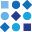

In [9]:
#driver = webdriver.Chrome('C:\Chrome\chromedriver.exe')
#driver.maximize_window()
#time.sleep(8)

from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.get("https://www.google.com")

driver.get(URL)
driver.maximize_window()
time.sleep(8)

soup = bs(driver.page_source, 'lxml')

print(soup)
#var2 = soup.find('span',{'class':'ng-scope ng-isolate-scope'}).text
#print(var2)